# Importing the Dependencies

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data Collection & Preprocessing

In [11]:
# Loading the data from csv file to a pandas DataFrame
raw_mail_data = pd.read_csv('mail_data.csv')


In [12]:
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
# Replace the Null Values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [14]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
mail_data.shape

(5572, 2)

# Label Encoding

In [17]:
# Label spam mail as 0; ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam','Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham','Category',] = 1

In [18]:
X = mail_data['Message']
Y = mail_data['Category']

In [19]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [20]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

# Splitting the data into training data & test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction

In [25]:
# Transform the text data to feature vectors that can be used as a input to the Logistic Regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [26]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [27]:
print(X_train_features)

  (np.int32(0), np.int32(2329))	0.38783870336935383
  (np.int32(0), np.int32(3811))	0.34780165336891333
  (np.int32(0), np.int32(2224))	0.413103377943378
  (np.int32(0), np.int32(4456))	0.4168658090846482
  (np.int32(0), np.int32(5413))	0.6198254967574347
  (np.int32(1), np.int32(3811))	0.17419952275504033
  (np.int32(1), np.int32(3046))	0.2503712792613518
  (np.int32(1), np.int32(1991))	0.33036995955537024
  (np.int32(1), np.int32(2956))	0.33036995955537024
  (np.int32(1), np.int32(2758))	0.3226407885943799
  (np.int32(1), np.int32(1839))	0.2784903590561455
  (np.int32(1), np.int32(918))	0.22871581159877646
  (np.int32(1), np.int32(2746))	0.3398297002864083
  (np.int32(1), np.int32(2957))	0.3398297002864083
  (np.int32(1), np.int32(3325))	0.31610586766078863
  (np.int32(1), np.int32(3185))	0.29694482957694585
  (np.int32(1), np.int32(4080))	0.18880584110891163
  (np.int32(2), np.int32(6601))	0.6056811524587518
  (np.int32(2), np.int32(2404))	0.45287711070606745
  (np.int32(2), np.int3

# Training the Model

### Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
# Training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

### Evaluating the trained Model

In [32]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [33]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [34]:
# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [35]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


In [37]:
print("\nClassification Report (Test Data):")



Classification Report (Test Data):


In [39]:
print(classification_report(Y_test, prediction_on_test_data, target_names=['Spam', 'Ham']))


              precision    recall  f1-score   support

        Spam       1.00      0.76      0.86       155
         Ham       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [40]:
precision = precision_score(Y_test, prediction_on_test_data)
recall = recall_score(Y_test, prediction_on_test_data)
f1 = f1_score(Y_test, prediction_on_test_data)

In [41]:
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Precision: 0.9629
Recall:    1.0000
F1-Score:  0.9811


In [42]:
cm = confusion_matrix(Y_test, prediction_on_test_data)


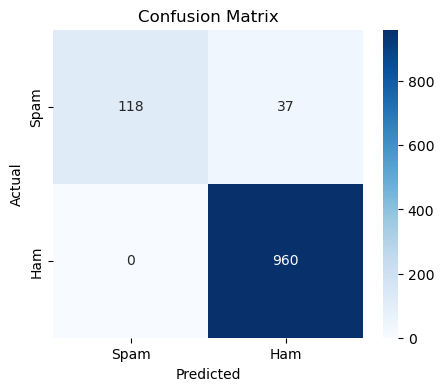

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam','Ham'], yticklabels=['Spam','Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()